In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# count the number of images in the respective classes 1 - Kidney tumor and 0 - Normal
ROOT_DIR ="/content/data"

## Split data into 
 * 70 % train data
 * 30 % test data

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio(ROOT_DIR,output="splited_data",
                   seed=42,
                   ratio=(.7,.0,.3),
                   group_prefix=None)

Copying files: 7360 files [00:03, 1963.84 files/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Convolution2D,ZeroPadding2D

In [ ]:
# generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/splited_data/train",
    labels = "inferred",
    label_mode ="int",
    batch_size=64,
    image_size=(256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/splited_data/test",
    labels = "inferred",
    label_mode ="int",
    batch_size=64,
    image_size=(256,256)
)

Found 5151 files belonging to 2 classes.
Found 2209 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation="relu",input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
# model.add(Dropout(0.05))
model.add(Dense(64,activation="relu"))
# model.add(Dropout(0.025))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
# model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(256,256,3)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2),strides=2,padding="same"))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=2,padding="same"))

# # model.add(ZeroPadding2D((1,1)))
# # model.add(Convolution2D(256, 3, 3, activation='relu'))
# # model.add(ZeroPadding2D((1,1)))
# # model.add(Convolution2D(256, 3, 3, activation='relu'))
# # model.add(ZeroPadding2D((1,1)))
# # model.add(Convolution2D(256, 3, 3, activation='relu'))
# # model.add(MaxPooling2D((2,2), strides=2,padding="same"))

# # model.add(ZeroPadding2D((1,1)))
# # model.add(Convolution2D(512, 3, 3, activation='relu'))
# # model.add(ZeroPadding2D((1,1)))
# # model.add(Convolution2D(512, 3, 3, activation='relu'))
# # model.add(ZeroPadding2D((1,1)))
# # model.add(Convolution2D(512, 3, 3, activation='relu'))
# # model.add(MaxPooling2D((2,2), strides=2,padding="same"))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=2,padding="same"))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
hist=model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
81/81 [==============================] - 43s 441ms/step - loss: 0.1994 - accuracy: 0.9132 - precision_8: 0.9424 - recall_8: 0.7672 - val_loss: 0.0052 - val_accuracy: 0.9982 - val_precision_8: 0.9942 - val_recall_8: 1.0000
Epoch 2/5
81/81 [==============================] - 30s 352ms/step - loss: 4.9058e-04 - accuracy: 1.0000 - precision_8: 1.0000 - recall_8: 1.0000 - val_loss: 7.6900e-05 - val_accuracy: 1.0000 - val_precision_8: 1.0000 - val_recall_8: 1.0000
Epoch 3/5
81/81 [==============================] - 28s 334ms/step - loss: 4.9069e-05 - accuracy: 1.0000 - precision_8: 1.0000 - recall_8: 1.0000 - val_loss: 3.4876e-05 - val_accuracy: 1.0000 - val_precision_8: 1.0000 - val_recall_8: 1.0000
Epoch 4/5
81/81 [==============================] - 29s 342ms/step - loss: 2.4596e-05 - accuracy: 1.0000 - precision_8: 1.0000 - recall_8: 1.0000 - val_loss: 2.0442e-05 - val_accuracy: 1.0000 - val_precision_8: 1.0000 - val_recall_8: 1.0000
Epoch 5/5
81/81 [==============================]

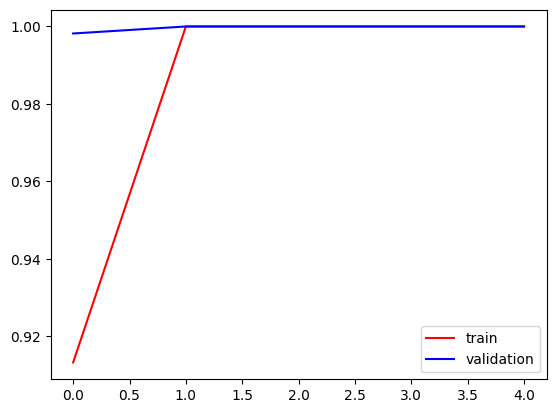

In [ ]:
plt.plot(hist.history["accuracy"],color="red",label="train")
plt.plot(hist.history['val_accuracy'],color="blue",label="validation")
plt.legend()
plt.show()

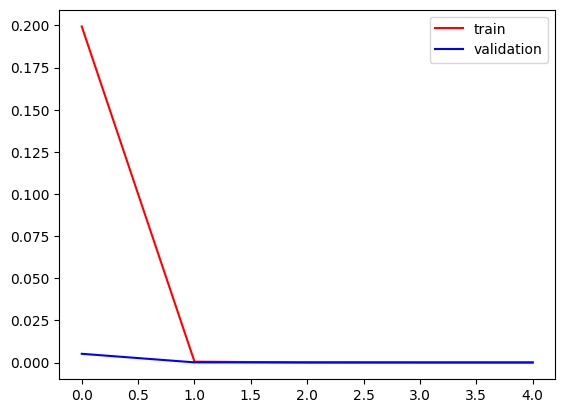

In [ ]:
plt.plot(hist.history["loss"],color="red",label="train")
plt.plot(hist.history['val_loss'],color="blue",label="validation")
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
# test_img =cv2.imread("/content/data/Normal/Normal- (1000).jpg")
test_img =cv2.imread("/content/data/Tumor/Tumor- (110).jpg")

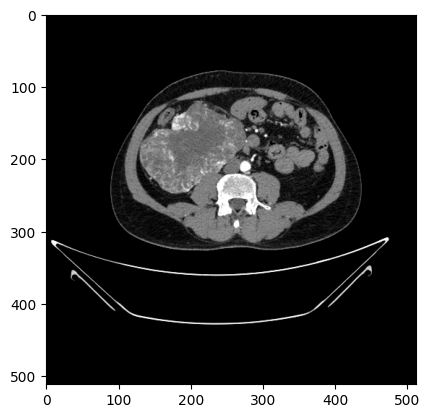

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(512, 512, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input =test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 203ms/step


array([[1.]], dtype=float32)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [ ]:
# print("Accuracy:",accuracy_score(validation_ds,train_ds))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",precision_score(validation_ds,train_ds))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",recall_score(validation_ds,train_ds))

# # Model F1: what percentage of positive tuples are labelled as such?
# print("F1:",f1_score(validation_ds,train_ds))

# # Model Confusion Matrix
# print("Confusion Matrix:",confusion_matrix(validation_ds,train_ds))

# # Model Classification Report
# print("Classification Report:",classification_report(validation_ds,train_ds))